# Worksheet 02

Name:  Tyler Nguyen
UID: U13947916

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?
In a top down approach we 

Drawback of a top down approach has a more rigid structure and not as adaptable to change, limiting creativity and flexibitly. In coding this might mean the higher level functions are coded first, leaving the more detailed functions for later. This can lead to a non fully functional code until the very end.

b) What is a drawback of the bottom up approach?

A bottom up approach can struggle with proper organization leading to inefficiencies and alighment with over all goals.

c) What are 3 things you can do to have a better debugging experience?

- Read the error
- Take your time and trace
- look online after a certain amount of time

d) (Optional) Follow along with the live coding. You can write your code here:

In [9]:
class Board:
    
    def __init__(self):
        self.board = [["" for _ in range(8)] for _ in range(8)]
        
    def __repr__(self):
        res = ""
        for row in range(8):
            for col in range(8):
                res += self.board[row][col]
                res += "-"
            res += "\n"
        return res
    
    def set_queen_at(self, row, col):
        self.board[row][col] = "Q"
    
    def unset_queen_at(self, row):
        self.board[row] = ["" for _ in range(8)]
        
# test = Board()
# test.set_queen_at(2,3)
# test

--------
--------
---Q-----
--------
--------
--------
--------
--------

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [110]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


b) Complete the code so it returns the number of rows that have at least one empty column value

In [111]:
non_empty_df = df.dropna() 
print("there are " +  str(len(df) - len(non_empty_df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [112]:
df = df = df.dropna(axis=1, thresh=len(df) - 200)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [113]:
df['Sex'] = df['Sex'].str.replace('female', '1').replace('male', '0')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [151]:
df[['Last Name', 'Title', 'First Name', 'Middle Name']] = df['Name'].str.split('[,.]', expand=True)[[0, 1, 2, 3]].rename(columns={0: 'Last Name', 1: 'Title', 2: 'First Name', 3: 'Middle Name'})
df['Middle Name'] = df['First Name'].str.split().str[1]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William Henry,Henry


f) Complete the code below to replace all missing ages with the average age

In [118]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

0                                   [, Owen, Harris]
1      [, John, Bradley, (Florence, Briggs, Thayer)]
2                                          [, Laina]
3              [, Jacques, Heath, (Lily, May, Peel)]
4                                 [, William, Henry]
                           ...                      
886                                       [, Juozas]
887                              [, Margaret, Edith]
888                   [, Catherine, Helen, "Carrie"]
889                                 [, Karl, Howell]
890                                      [, Patrick]
Name: fm, Length: 891, dtype: object

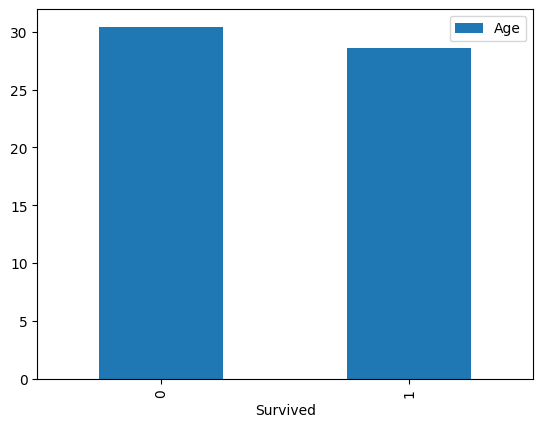

In [146]:
data = df[['Survived', 'Age']].groupby('Survived').mean()

data.plot(kind="bar")

I see that the average age of those that did not survive are higher than the average age of those who did survive. However the age gap is still very small. 